In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
# #feature extraction using VGG-19
from keras.layers import Input
from keras.models import Model
from keras.applications.xception import Xception,preprocess_input
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading in the csv data
df = pd.read_csv('C:\\Users\\sarita.mukherjee\\Downloads\\Capstone_Project\\train.csv',error_bad_lines=False)
fashion_dir = 'C:\\Users\\sarita.mukherjee\\Downloads\\Capstone_Project\\fashion'
df.head()
#considering only 600 images for quick performance
df = df.iloc[:600]
import cv2
for i in df.images:
    #print(i)
    imageName = 'C:\\Users\\sarita.mukherjee\\Downloads\\Capstone_Project\\fashion\\'+ i
    image = cv2.imread(imageName) 
    #plt.imshow(image)
    #plt.title('Image')
    #plt.show()
df.nunique()
df.columns
batch_size = 32

In [4]:
from keras_preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    validation_split=0.20,
    rescale=1.0/255.0,
     horizontal_flip=True
)
test_datagen = ImageDataGenerator(
    validation_split=0.20,
    rescale = 1./255)
training_set = train_generator.flow_from_dataframe(
    dataframe=df,
    directory=fashion_dir,
    x_col="images",
    y_col="target",
    target_size=(299,299),
    batch_size=batch_size,
    class_mode = 'categorical',
    subset="training"
)

test_set = test_datagen.flow_from_dataframe(
    dataframe=df,
    directory=fashion_dir,
    x_col="images",
    y_col="target",
    target_size=(299,299),
    batch_size=batch_size,
    class_mode = 'categorical',
    subset="validation"
)

Found 480 validated image filenames belonging to 4 classes.
Found 120 validated image filenames belonging to 4 classes.


In [5]:
classes = len(training_set.class_indices)

In [6]:
#add preprocessing layer to the front of Inception
IMAGE_SIZE = [299, 299]
xception = Xception(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)

In [7]:
#we will not train existing weights
for layer in xception.layers:
    layer.trainable = False
x = Flatten()(xception.output)
prediction = Dense(classes, activation='softmax')(x)
print(prediction)
# create a model object
model = Model(inputs=xception.input, outputs=prediction)
# view the structure of the model
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='dense/Softmax:0', description="created by layer 'dense'")
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 

In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
r=model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
15/15 [==============================] - 380s 24s/step - loss: 7.6162 - accuracy: 0.6234 - val_loss: 1.6049 - val_accuracy: 0.9083
Epoch 2/20
15/15 [==============================] - 222s 15s/step - loss: 0.3443 - accuracy: 0.9560 - val_loss: 2.4894 - val_accuracy: 0.7833
Epoch 3/20
15/15 [==============================] - 300s 21s/step - loss: 0.6876 - accuracy: 0.9363 - val_loss: 0.9600 - val_accuracy: 0.9167
Epoch 4/20
15/15 [==============================] - 185s 13s/step - loss: 0.1481 - accuracy: 0.9737 - val_loss: 1.2404 - val_accuracy: 0.9083
Epoch 5/20
15/15 [==============================] - 119s 8s/step - loss: 0.1712 - accuracy: 0.9719 - val_loss: 0.6374 - val_accuracy: 0.9333
Epoch 6/20
15/15 [==============================] - 228s 16s/step - loss: 0.4804 - accuracy: 0.9607 - val_loss: 0.3447 - val_accuracy: 0.9750
Epoch 7/20
15/15 [==============================] - 124s 8s/step - loss: 0.0019 - accuracy: 0.9991 - val_loss: 0.9977 - val_accuracy: 0.9583
Epoch 8/

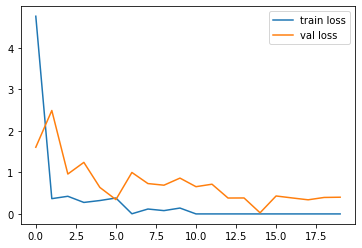

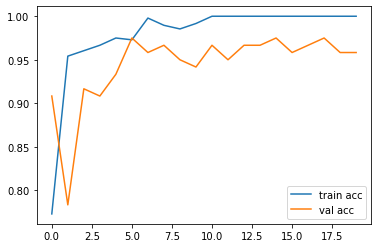

<Figure size 432x288 with 0 Axes>

In [10]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

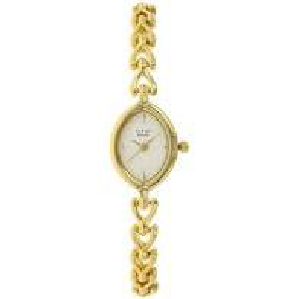

In [81]:
from keras.preprocessing import image
file_name = 'Jewelry_test3.jfif'
img = image.load_img(file_name, target_size=(299, 299))
img

In [82]:
ary = image.img_to_array(img)
ary.shape

(299, 299, 3)

In [83]:
ary=ary/255


In [84]:
import numpy as np
x=np.expand_dims(ary,axis=0)
#img_data=preprocess_input(x)
x.shape

(1, 299, 299, 3)

In [85]:
preds = model.predict(x)
preds=np.argmax(preds, axis=1)
print(preds)
if preds==0:
        preds="The Image is Bag"
elif preds==1:
    preds="The Image is Beauty"
elif preds==2:
    preds="The Image is Jewelry and watches"
else:
    preds="The Image is Shoe"
print(preds)

[2]
The Image is Jewelry and watches
